In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn.datasets as skdata

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
def predict(x, *, clfs, coefs):
    return np.array([
        k * clf.predict(x)
        for k, clf in zip(coefs, clfs)
    ]).sum(axis=0)


def fit(x, y, *, clfs, coefs):
    clf_initial, *clfs = clfs    
    fitted_clfs = [clf_initial.fit(x, y)]
    for clf in clfs:
        errors = y - predict(x, clfs=fitted_clfs, coefs=coefs)
        fitted_clfs.append(clf.fit(x, errors))
    return fitted_clfs


class SimpleGradientBoostingRegressor:

    def __init__(self, *, n_estimators, learning_rates, max_depth, random_state):
        self.n_estimators = n_estimators
        self.learning_rates = learning_rates
        self.max_depth = max_depth
        self.random_state = random_state
        self.learning_rates = learning_rates        
        self.classifiers = [
            DecisionTreeRegressor(
                max_depth=self.max_depth, random_state=self.random_state)
            for _ in range(self.n_estimators)
        ]
        
    def fit(self, x, y):
        return fit(x, y, clfs=self.classifiers, coefs=self.learning_rates)
    
    def predict(self, x):
        return predict(x, clfs=self.classifiers, coefs=self.learning_rates)

In [3]:
boston_dataset = skdata.load_boston()

X = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
Y = pd.DataFrame(boston_dataset['target'])

In [4]:
x_train, x_test = train_test_split(X, test_size=.25)

y_train = np.hstack(Y.iloc[x_train.index].to_numpy())
y_test = np.hstack(Y.iloc[x_test.index].to_numpy())

x_test = x_test.to_numpy()
x_train = x_train.to_numpy()

In [5]:
N_CLFS = 50
coefs = np.array([0.9 for _ in range(N_CLFS)])

sgbr = SimpleGradientBoostingRegressor(
    n_estimators=N_CLFS, 
    learning_rates=coefs, 
    max_depth=5,
    random_state=42)

sgbr.fit(x_train, y_train)

mse_test = mean_squared_error(
    y_test,
    sgbr.predict(x_test))
print(mse_test)

11.712402727815908


In [6]:
N_CLFS = 50
coefs = np.array([0.9 / (1+i) for i in range(N_CLFS)])

sgbr = SimpleGradientBoostingRegressor(
    n_estimators=N_CLFS, 
    learning_rates=coefs, 
    max_depth=5,
    random_state=42)

sgbr.fit(x_train, y_train)

mse_test = mean_squared_error(
    y_test,
    sgbr.predict(x_test))
print(mse_test)

8.52112790062686


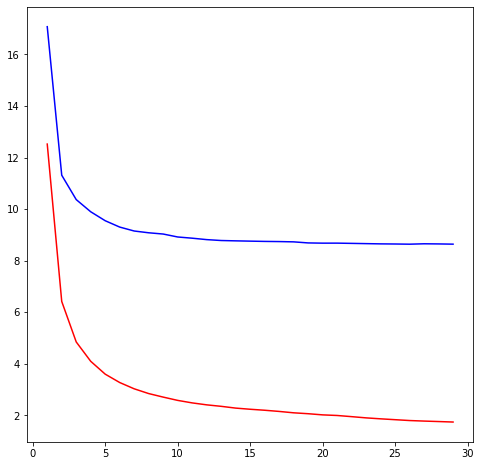

In [7]:
niters = np.arange(1, 30)
mse_trains = []
mse_tests = []

for niter in niters:
    coefs = np.array([0.9 / (i+1) for i in range(niter)])
    sgbr = SimpleGradientBoostingRegressor(
        n_estimators=niter, 
        learning_rates=coefs, 
        max_depth=5,
        random_state=42)
    sgbr.fit(x_train, y_train)
    
    mse_test = mean_squared_error(
        y_test, sgbr.predict(x_test))
    mse_tests.append(mse_test)
    
    mse_train = mean_squared_error(
        y_train, sgbr.predict(x_train))
    mse_trains.append(mse_train)
    
    
_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(niters, mse_trains, c='red')
ax.plot(niters, mse_tests, c= 'blue')

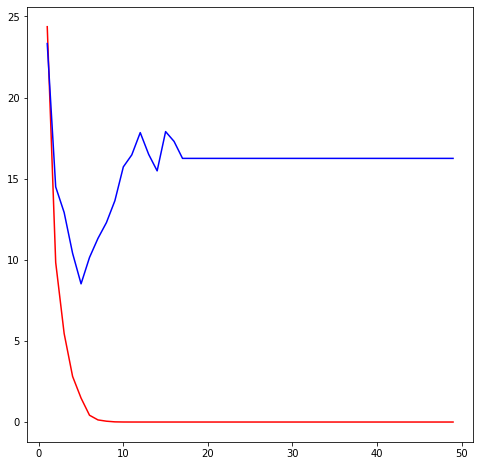

In [8]:
coefs = np.array([0.9 / (i+1) for i in range(50)])

depths = np.arange(1, 50)
mse_trains = []
mse_tests = []

for depth in depths:
    sgbr = SimpleGradientBoostingRegressor(
        n_estimators=50, 
        learning_rates=coefs, 
        max_depth=depth,
        random_state=42)
    sgbr.fit(x_train, y_train)

    mse_test = mean_squared_error(
        y_test, sgbr.predict(x_test))
    mse_tests.append(mse_test)

    mse_train = mean_squared_error(
        y_train, sgbr.predict(x_train))
    mse_trains.append(mse_train)


_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(depths, mse_trains, c='red')
ax.plot(depths, mse_tests, c= 'blue')

In [11]:
regr = LinearRegression()
regr.fit(x_train, y_train)

mse_lr = mean_squared_error(
    y_test,
    regr.predict(x_test))

N_CLFS = 50
coefs = np.array([0.9 / (1+i) for i in range(N_CLFS)])
sgbr = SimpleGradientBoostingRegressor(
    n_estimators=N_CLFS, 
    learning_rates=coefs, 
    max_depth=5,
    random_state=42)
sgbr.fit(x_train, y_train)
mse_sgbr = mean_squared_error(
    y_test,
    sgbr.predict(x_test))

print(np.sqrt(mse_sgbr))
print(np.sqrt(mse_lr))

2.9190971036652513
3.9847238339657434
